In [48]:
from model.module.path_header import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [26]:
TRAIN_NAME = '0906-09-train-v2-withNA.csv'
TRAIN2_NAME = '0906-09-train-v2.csv'
LABEL_NAME = 'train_label.csv'
TEST1_NAME = '0906-09-test1-v2-withNA.csv'
TEST2_NAME = '0906-09-test2-v2-withNA.csv'


TRAIN_PATH = os.path.join(PREPROCESS_DIR, TRAIN_NAME)
TRAIN2_PATH = os.path.join(PREPROCESS_DIR, TRAIN2_NAME)
LABEL_PATH = os.path.join(PREPROCESS_DIR, LABEL_NAME)
TEST1_PATH = os.path.join(PREPROCESS_DIR, TEST1_NAME)
TEST2_PATH = os.path.join(PREPROCESS_DIR, TEST2_NAME)

In [255]:
train = pd.read_csv(TRAIN_PATH)
train2 = pd.read_csv(TRAIN2_PATH)
label = pd.read_csv(LABEL_PATH)

In [256]:
label.head()

,acc_id,survival_time,amount_spent
0,2,64,0.000000
1,5,60,0.000000
2,8,64,0.020310
3,17,64,0.070642
4,20,64,0.052137


In [257]:
label['isSurvival'] = label['survival_time'].transform(lambda x: 1 if x==64 else 0)

In [258]:
label.head()

,acc_id,survival_time,amount_spent,isSurvival
0,2,64,0.000000,1
1,5,60,0.000000,0
2,8,64,0.020310,1
3,17,64,0.070642,1
4,20,64,0.052137,1


In [311]:
ids = np.unique(train2.acc_id)
days = np.unique(train2.day)

df = train2.drop(['day'], axis=1)
cols = df.columns

In [312]:
df.columns

Index(['acc_id', 'combat_count', 'c_etc_cnt', 'c_num_opponent', 'c_pledge_cnt',
       'c_random_attacker_cnt', 'c_random_defender_cnt', 'c_same_pledge_cnt',
       'c_temp_cnt', 'isMajorClass', 'combat_logged_in', 'tot_start_lv',
       'tot_end_lv', 'changed_lv', 'avg_start_lv', 'avg_end_lv',
       'avg_play_rate_rank_per_p', 'p_c_char_cnt', 'p_c_sum_play_time',
       'p_etc_cnt', 'p_non_c_sum_play_time', 'p_play_char_cnt', 'p_c_cnt',
       'p_random_attacker_cnt', 'p_random_defender_cnt', 'p_same_pledge_cnt',
       'p_temp_cnt', 'tot_c_rank_per_p', 'pledge_num_people',
       'pledge_logged_in', 'sell_item_amount', 'sell_item_price',
       'get_item_amount', 'get_item_price', 'trade_time_bin_0',
       'trade_time_bin_1', 'trade_time_bin_2', 'trade_time_bin_3',
       'trade_type_0', 'trade_type_1', 'tot_trade_amount', 'tot_get_money',
       'trade_logged_in', 'count_sell', 'count_get', 'total_trade_count',
       'a_death_cnt', 'a_enchant_count', 'a_exp_recovery_cnt', 'a_fish

In [271]:
len(cols)

72

# 28일 뭉쳐서 개략적으로 corr

In [318]:
df = df.groupby('acc_id').mean()

In [314]:
df3 = df.values.reshape(-1,28,72)

In [315]:
df2.head()

,combat_count,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_random_attacker_cnt,c_random_defender_cnt,c_same_pledge_cnt,c_temp_cnt,isMajorClass,combat_logged_in,...,sexp_per_playtime,pexp_per_playtime,activity_logged_in,amount_spent,max_spent,min_spent,mean_spent,tot_spent,median_spent,payment_logged_in
acc_id,,,,,,,,,,,,,,,,,,,,,
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.642857,0.000000,0.003505,0.000000,0.000000,0.000000,0.000000,0.017133,1.000000,0.357143,...,0.154602,0.030398,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,4.750000,0.032175,0.108643,0.004585,0.152531,0.042252,0.000000,0.137065,0.459864,1.000000,...,2.094823,0.000000,1.000000,0.050166,0.075437,0.024894,0.050166,0.100332,0.050166,0.071429
17,1.857143,0.024131,0.049064,0.000000,0.000000,0.084505,0.442795,0.119932,0.699405,1.000000,...,0.509362,0.608762,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20,1.357143,0.587189,0.360974,0.045846,0.000000,0.042252,0.000000,0.017133,0.000000,0.964286,...,0.013091,0.003425,0.964286,0.032019,0.088513,0.003772,0.032019,0.096057,0.003772,0.107143


In [316]:
df3 = pd.DataFrame(df3.mean(axis=1), columns=cols).head()

In [317]:
df3

,acc_id,combat_count,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_random_attacker_cnt,c_random_defender_cnt,c_same_pledge_cnt,c_temp_cnt,isMajorClass,...,sexp_per_playtime,pexp_per_playtime,activity_logged_in,amount_spent,max_spent,min_spent,mean_spent,tot_spent,median_spent,payment_logged_in
0,2.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.0,0.642857,0.000000,0.003505,0.000000,0.000000,0.000000,0.000000,0.017133,1.000000,...,0.154602,0.030398,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,8.0,4.750000,0.032175,0.108643,0.004585,0.152531,0.042252,0.000000,0.137065,0.459864,...,2.094823,0.000000,1.000000,0.050166,0.075437,0.024894,0.050166,0.100332,0.050166,0.071429
3,17.0,1.857143,0.024131,0.049064,0.000000,0.000000,0.084505,0.442795,0.119932,0.699405,...,0.509362,0.608762,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,20.0,1.357143,0.587189,0.360974,0.045846,0.000000,0.042252,0.000000,0.017133,0.000000,...,0.013091,0.003425,0.964286,0.032019,0.088513,0.003772,0.032019,0.096057,0.003772,0.107143


In [319]:
df.shape

(40000, 71)

In [320]:
res = np.concatenate((df, label[['amount_spent', 'isSurvival']]), axis=1)
res.shape

(40000, 73)

In [321]:
# amount_spent 컬럼명이 train dataset 꺼와 중복이라 변경
cols = list(cols)
cols.pop(0) # pop 'acc_id'
cols.append('label_amount_spent')
cols.append('label_isSurvival')


In [322]:
len(cols)

73

In [323]:
df = pd.DataFrame(res, index=ids, columns=cols)

In [324]:
cor = df.corr(method='spearman').drop(['label_isSurvival','label_amount_spent'])
sur = cor.sort_values('label_isSurvival', ascending=False).label_isSurvival
amo = cor.sort_values('label_amount_spent', ascending=False).label_amount_spent

In [325]:
amo

payment_logged_in        0.647643
tot_spent                0.645074
max_spent                0.637380
amount_spent             0.627962
mean_spent               0.627950
median_spent             0.607893
a_fish                   0.558783
min_spent                0.513003
fishing_prop             0.493342
a_boss_monster           0.468405
get_item_amount          0.424854
tot_c_rank_per_p         0.413670
p_c_cnt                  0.400807
tot_start_lv             0.396111
tot_end_lv               0.392950
p_same_pledge_cnt        0.392648
p_random_attacker_cnt    0.392578
count_get                0.380361
p_temp_cnt               0.364158
c_num_opponent           0.357983
p_etc_cnt                0.357941
p_c_char_cnt             0.355829
c_pledge_cnt             0.337994
pledge_num_people        0.337626
c_temp_cnt               0.336778
a_quest_exp              0.333632
trade_type_1             0.326761
get_item_price           0.321243
c_etc_cnt                0.314348
a_npc_kill    

In [292]:
droplist = sur[abs(sur)<0.07].index

In [293]:
droplist

Index(['c_pledge_cnt', 'tot_spent', 'amount_spent', 'mean_spent',
       'payment_logged_in', 'tot_get_money', 'p_same_pledge_cnt',
       'median_spent', 'avg_start_lv', 'p_random_attacker_cnt', 'isMajorClass',
       'avg_end_lv', 'c_num_opponent', 'a_enchant_count', 'min_spent',
       'c_etc_cnt', 'c_random_defender_cnt', 'pledge_num_people',
       'a_exp_recovery_cnt', 'p_c_cnt', 'tot_c_rank_per_p', 'a_party_exp',
       'a_money_change', 'p_temp_cnt', 'pexp_per_playtime',
       'p_non_c_sum_play_time', 'a_revive_cnt', 'p_etc_cnt'],
      dtype='object')

In [299]:
len(amo)

71

In [303]:
amo[abs(amo)>0.3]

payment_logged_in           0.647643
tot_spent                   0.645074
max_spent                   0.637380
amount_spent                0.627962
mean_spent                  0.627950
median_spent                0.607893
a_fish                      0.558783
min_spent                   0.513003
fishing_prop                0.493342
a_boss_monster              0.468405
get_item_amount             0.424854
tot_c_rank_per_p            0.413670
p_c_cnt                     0.400807
tot_start_lv                0.396111
tot_end_lv                  0.392950
p_same_pledge_cnt           0.392648
p_random_attacker_cnt       0.392578
count_get                   0.380361
p_temp_cnt                  0.364158
c_num_opponent              0.357983
p_etc_cnt                   0.357941
p_c_char_cnt                0.355829
c_pledge_cnt                0.337994
pledge_num_people           0.337626
c_temp_cnt                  0.336778
a_quest_exp                 0.333632
trade_type_1                0.326761
g

In [294]:
sur[abs(sur)>0.07]

activity_logged_in          0.371275
combat_logged_in            0.371275
a_playtime                  0.295498
trade_logged_in             0.293786
sell_item_price             0.290888
count_sell                  0.279258
sell_item_amount            0.271477
combat_count                0.267184
trade_type_0                0.255549
get_item_price              0.252454
trade_time_bin_3            0.251793
trade_time_bin_2            0.231721
tot_trade_amount            0.228767
total_trade_count           0.224007
a_private_shop              0.223550
trade_time_bin_0            0.206159
trade_time_bin_1            0.196969
count_get                   0.191740
a_fish                      0.174469
trade_type_1                0.172122
a_boss_monster              0.145595
fishing_prop                0.143418
get_item_amount             0.135229
tot_start_lv                0.122068
pledge_logged_in            0.116991
c_temp_cnt                  0.116852
tot_end_lv                  0.115842
a

<Figure size 648x648 with 0 Axes>

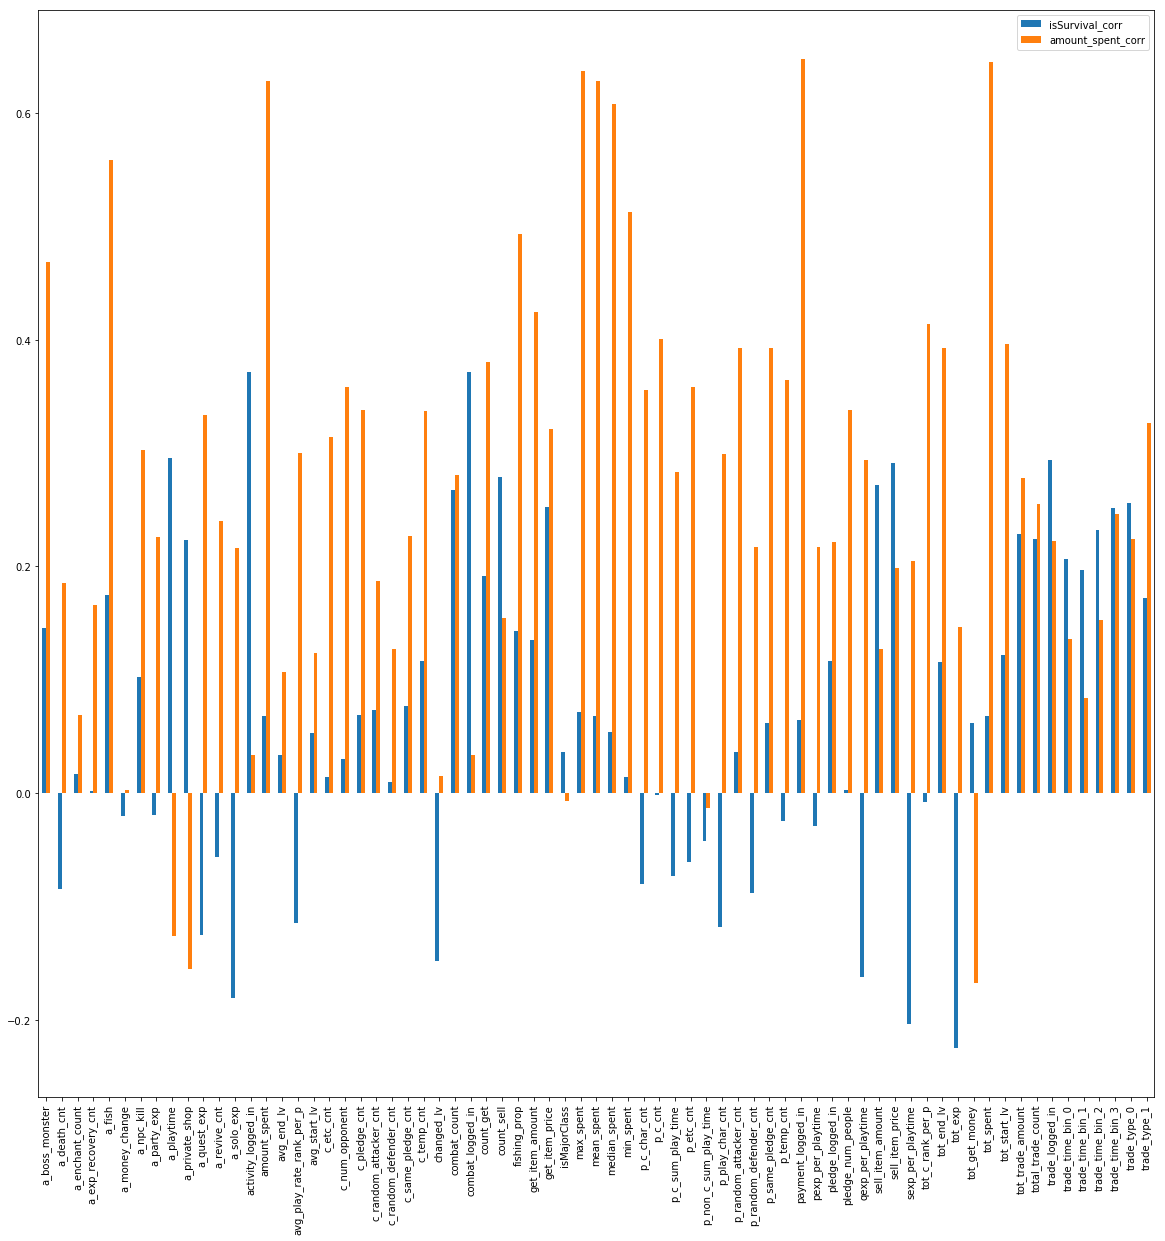

In [284]:
plt.figure(figsize=(9,9))
df_cor = pd.DataFrame({'isSurvival_corr':sur, 'amount_spent_corr':amo})
df_cor.plot.bar(figsize=(20,20))


In [212]:
res = np.concatenate((df, label[['amount_spent', 'isSurvival']]), axis=1)

# amount_spent 컬럼명이 train dataset 꺼와 중복이라 변경
cols = list(cols)
cols.append('label_amount_spent')
cols.append('label_isSurvival')

df_list = []
for day in range(len(days)):
    df_list.append(pd.DataFrame(res[day], index=ids, columns=cols).set_index('acc_id'))

ValueError: Shape of passed values is (73, 1), indices imply (40000, 74)

In [ ]:
cor = df.corr(method='spearman').drop(['label_isSurvival','label_amount_spent'])
sur = cor.sort_values('label_isSurvival', ascending=False).label_isSurvival
amo = cor.sort_values('label_amount_spent', ascending=False).label_amount_spent

# 28일 각각의 corr 

In [162]:
df = np.asarray(df)
print(df.shape)
df = df.reshape(-1,28,72)
print(df.shape)
df = df.transpose(1,0,2) # 각 날짜에 대한 전체 유저 정보
print(df.shape)

(1120000, 72)
(40000, 28, 72)
(28, 40000, 72)


In [163]:
label[['amount_spent', 'isSurvival']].shape

(40000, 2)

In [164]:
res = []
for data_a_day in df:
    res.append(np.concatenate((data_a_day, label[['amount_spent', 'isSurvival']]), axis=1))
res = np.asarray(res)
print(res.shape) # label amoun_spent, isSurvival 추가된 상태

(28, 40000, 74)


In [166]:
# amount_spent 컬럼명이 train dataset 꺼와 중복이라 변경
cols = list(cols)
cols.append('label_amount_spent')
cols.append('label_isSurvival')

In [189]:
df_list = []
for day in range(len(days)):
    df_list.append(pd.DataFrame(res[day], index=ids, columns=cols).set_index('acc_id'))

In [200]:
# 28일 각각에 대한 corr
sur_list = []
amo_list = []
for df in df_list:
    cor = df.corr(method='spearman').drop(['label_isSurvival','label_amount_spent'])
    sur = cor.sort_values('label_isSurvival', ascending=False).label_isSurvival
    amo = cor.sort_values('label_amount_spent', ascending=False).label_amount_spent
    sur_list.append(sur)
    amo_list.append(amo)
    
print(len(sur_list))
print(len(amo_list))

KeyboardInterrupt: 

(28, 40000, 73)